# Using NLP to analyse Competitor Gym reviews

### Import Packages and Datasets

In [70]:
# For dataframes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing all nltk related libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('all')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Sentiment Analysis
from textblob import TextBlob

# Regular Expressions
import re
import string

# Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# CountVectorizer, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# To ignore warning
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\julia\AppData\Roaming\nltk_data...
[

In [71]:
fitness_first_reviews = pd.read_csv('filtered-datasets/fitness-first-reviews.csv')
fitness_first_reviews.shape

(488, 6)

In [72]:
virgin_active_reviews = pd.read_csv('filtered-datasets/virgin-active-reviews.csv')
virgin_active_reviews.shape

(445, 6)

### Data Preparation
Use Text Processing Techniques to clean and prepare the text data for analysis.

In [73]:
# Setting lemmatizer variable
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

# Processing Review data 
def review_processor(review_data):
  # Changing all tweet texts to be lowercase
  review_data = review_data.lower()

  # Removing punctuation
  review_data = re.sub('\[.*?\]', '', review_data)

  # Removing special characters and numbers
  review_data = re.sub("[^a-z\s]", "", review_data)

  # Removing hashtags
  review_data = re.sub("#", " ", review_data)

  # Removing RT
  review_data = re.sub("RT[\s]+", "", review_data)

  # Removing hyperlinks
  review_data = re.sub('https?://\S+|www\.\S+', '', review_data)

  review_data = re.sub('<.*?>+', '', review_data)

  review_data = re.sub('[%s]' % re.escape(string.punctuation), '', review_data)

  # Removing lines separated by \n
  review_data = re.sub('\n', '', review_data)

  # Removing usernames
  review_data = re.sub('\w*\d\w*', '', review_data)

  # Removing stopwords
  review_data = [word for word in review_data.split(' ') if word not in stopword]
  review_data = " ".join(review_data)

  # Lemmatisation
  review_data = [lemmatizer.lemmatize(word) for word in review_data.split(' ')]
  review_data = " ".join(review_data)
  # review_data = ",".join([str(i) for i in review_data])
  return review_data

In [74]:
# Subjectivity of the processed data from 0 to 1, 0 means neutral/facts, 1 means personal opinion
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Polarity of the processed data from -1 to 1, -1 means negative, 0 means neutral, 1 means positive
# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Computing negative, neutral and positive analysis
def getComputation(score):
    if score < -0.5:
        return 'Very Negative'
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    elif score > 0:
        return 'Positive'

#### Fitness First

In [75]:
# Create a copy of the DataFrame to avoid modifying the original
ff_reviews = fitness_first_reviews.copy()

# Create columns for Processed_Review, Subjectivity, Polarity, Computation_Analysis
ff_reviews['Processed_Review'] = ff_reviews['review'].apply(review_processor)
ff_reviews['Subjectivity'] = ff_reviews['Processed_Review'].apply(getSubjectivity)
ff_reviews['Polarity'] = ff_reviews['Processed_Review'].apply(getPolarity)
ff_reviews['Computation_Analysis'] = ff_reviews['Polarity'].apply(getComputation)

ff_reviews.head(2)

,review,rating,gym,branch,length,year,Processed_Review,Subjectivity,Polarity,Computation_Analysis
0,Air In the gym very smelly gym never place air...,1,Fitness First,Junction 10,233,2024,air gym smelly gym never place air purifier to...,0.633333,-0.433333,Negative
1,This club doesnt even deserve one star rating ...,1,Fitness First,Junction 10,409,2024,club doesnt even deserve one star rating gym d...,0.555556,-0.025000,Negative


#### Virgin Active

In [76]:
# Create a copy of the DataFrame to avoid modifying the original
va_reviews = virgin_active_reviews.copy()

# Create columns for Processed_Review, Subjectivity, Polarity, Computation_Analysis
va_reviews['Processed_Review'] = va_reviews['review'].apply(review_processor)
va_reviews['Processed_Review'] = va_reviews['review'].apply(review_processor)
va_reviews['Subjectivity'] = va_reviews['Processed_Review'].apply(getSubjectivity)
va_reviews['Polarity'] = va_reviews['Processed_Review'].apply(getPolarity)
va_reviews['Computation_Analysis'] = va_reviews['Polarity'].apply(getComputation)

va_reviews.head(2)

,review,rating,gym,branch,length,year,Processed_Review,Subjectivity,Polarity,Computation_Analysis
0,The people at the counters are super nice & ac...,5,Virgin Active,Paya Lebar,140,2024,people counter super nice accommodating equip...,0.545238,0.347619,Positive
1,Started trial pass this week and attended my f...,5,Virgin Active,Paya Lebar,211,2024,started trial pas week attended first reformer...,0.381667,0.230000,Positive


### Part 1: Word Clouds by Rating
Compare word clouds for high (4-5 stars) and low (1-3 stars) ratings to identify key strengths and weaknesses of other competitors.

In [77]:
fitness_first_positive_reviews = ff_reviews[fitness_first_reviews['rating']>3]
fitness_first_negative_reviews = ff_reviews[fitness_first_reviews['rating']<4]
print('fitness_first_positive_reviews:',fitness_first_positive_reviews.shape)
print('fitness_first_negative_reviews:',fitness_first_negative_reviews.shape)

fitness_first_positive_reviews: (391, 10)
fitness_first_negative_reviews: (97, 10)


In [78]:
virgin_active_positive_reviews = va_reviews[virgin_active_reviews['rating']>3]
virgin_active_negative_reviews = va_reviews[virgin_active_reviews['rating']<4]
print('virgin_active_positive_reviews:',virgin_active_positive_reviews.shape)
print('virgin_active_negative_reviews:',virgin_active_negative_reviews.shape)

virgin_active_positive_reviews: (343, 10)
virgin_active_negative_reviews: (102, 10)


#### Fitness First

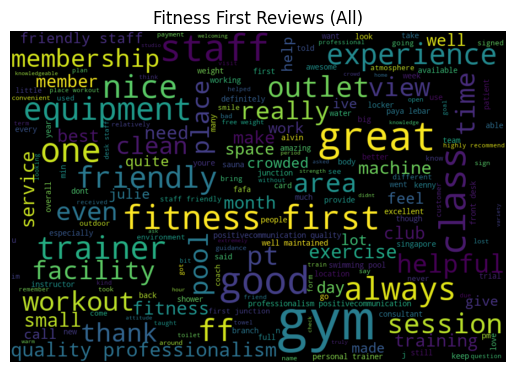

In [103]:
all_ff_reviews = ' '.join([review for review in ff_reviews['Processed_Review']])
RU_wordcloud=WordCloud(width=900, height=600, random_state=21, max_font_size=100).generate(all_ff_reviews)
plt.imshow(RU_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Fitness First Reviews (All)')
plt.show()

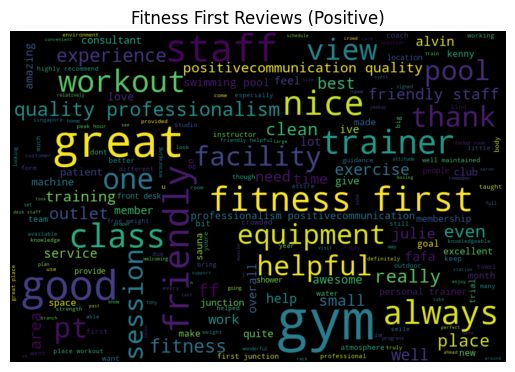

In [102]:
positive_ff_reviews = ' '.join([review for review in fitness_first_positive_reviews['Processed_Review']])
RU_wordcloud=WordCloud(width=900, height=600, random_state=21, max_font_size=100).generate(positive_ff_reviews)
plt.imshow(RU_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Fitness First Reviews (Positive)')
plt.show()

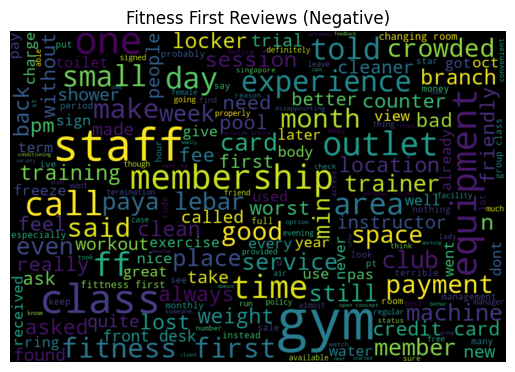

In [100]:
negative_ff_reviews = ' '.join([review for review in fitness_first_negative_reviews['Processed_Review']])
RU_wordcloud=WordCloud(width=900, height=600, random_state=21, max_font_size=100).generate(negative_ff_reviews)
plt.imshow(RU_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Fitness First Reviews (Negative)')
plt.show()

#### Virgin Active

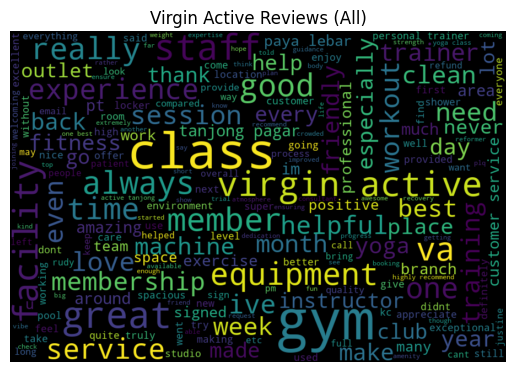

In [99]:
all_va_reviews = ' '.join([review for review in va_reviews['Processed_Review']])
RU_wordcloud=WordCloud(width=900, height=600, random_state=21, max_font_size=100).generate(all_va_reviews)
plt.imshow(RU_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Virgin Active Reviews (All)')
plt.show()

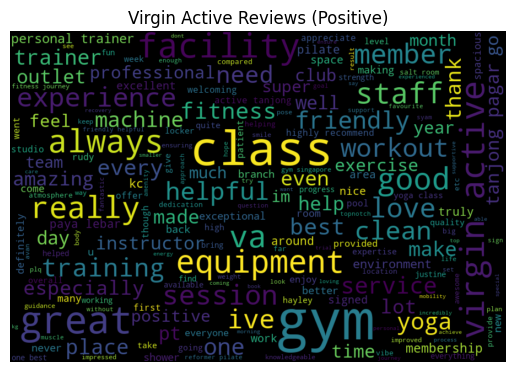

In [97]:
positive_va_reviews = ' '.join([review for review in virgin_active_positive_reviews['Processed_Review']])
RU_wordcloud=WordCloud(width=900, height=600, random_state=21, max_font_size=100).generate(positive_va_reviews)
plt.imshow(RU_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Virgin Active Reviews (Positive)')
plt.show()

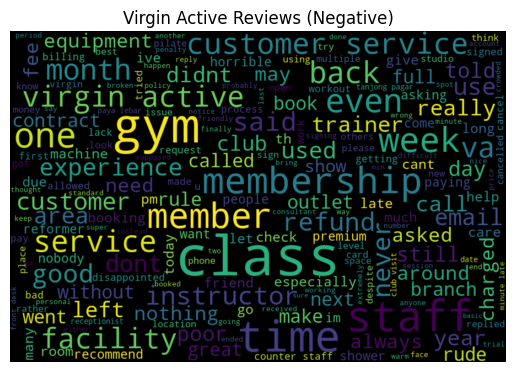

In [98]:
negative_va_reviews = ' '.join([review for review in virgin_active_negative_reviews['Processed_Review']])
RU_wordcloud=WordCloud(width=900, height=600, random_state=21, max_font_size=100).generate(negative_va_reviews)
plt.imshow(RU_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Virgin Active Reviews (Negative)')
plt.show()

### Part 2: Topic Modeling (LDA)
Discover hidden themes (e.g., equipment, classes, staff) to understand common concerns and strengths.

In [132]:
ff_reviews_copy = ff_reviews.copy()
va_reviews_copy = va_reviews.copy()

#### Fitness First

In [134]:
# 1. Prepare the review text data
reviews = ff_reviews_copy['review'].dropna().tolist()

# 2. Convert the reviews to a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(reviews)

# 3. Apply LDA to extract topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # You can adjust the number of topics
lda.fit(X)

# 4. Get the words associated with each topic
terms = vectorizer.get_feature_names_out()

# Display the top words for each topic
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print([terms[i] for i in topic.argsort()[-10:]])  # Top 10 words for the topic

# 5. Assign topics to reviews
topic_assignments = lda.transform(X)  # Get topic distribution for each review
ff_reviews_copy['lda_topic'] = topic_assignments.argmax(axis=1)

Topic 1:
['staff', 'alvin', 'gym', 'trainer', 'friendly', 'fitness', 'quality', 'communication', 'professionalism', 'positive']
Topic 2:
['equipment', 'area', 'nice', 'swimming', 'great', 'crowded', 'small', 'view', 'gym', 'pool']
Topic 3:
['outlet', 'classes', 'clean', 'great', 'helpful', 'card', 'good', 'friendly', 'gym', 'staff']
Topic 4:
['equipment', 'personal', 'friendly', 'workout', 'good', 'fitness', 'trainer', 'place', 'great', 'gym']
Topic 5:
['service', 'classes', 'good', 'experience', 'class', 'ff', 'gym', 'friendly', 'fitness', 'staff']


#### Virgin Active

In [135]:
# 1. Prepare the review text data
reviews = va_reviews_copy['review'].dropna().tolist()

# 2. Convert the reviews to a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(reviews)

# 3. Apply LDA to extract topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # You can adjust the number of topics
lda.fit(X)

# 4. Get the words associated with each topic
terms = vectorizer.get_feature_names_out()

# Display the top words for each topic
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print([terms[i] for i in topic.argsort()[-10:]])  # Top 10 words for the topic

# 5. Assign topics to reviews
topic_assignments = lda.transform(X)  # Get topic distribution for each review
va_reviews_copy['lda_topic'] = topic_assignments.argmax(axis=1)

Topic 1:
['class', 'helpful', 'really', 'great', 'va', 'equipment', 'staff', 'training', 'classes', 'gym']
Topic 2:
['va', 'great', 'experience', 'good', 'fitness', 'classes', 'active', 'facilities', 'virgin', 'gym']
Topic 3:
['reformer', 'service', 'instructors', 'facilities', 'great', 'gym', 'staff', 'class', 'classes', 'yoga']
Topic 4:
['membership', 'weeks', 'club', 'class', 'staff', 'service', 'virgin', 'classes', 'time', 'gym']
Topic 5:
['day', 'customer', 'love', 'place', 'membership', 'great', 'service', 'class', 'staff', 'gym']


### Part 3: Sentiment by Topic
Analyze sentiment for specific topics (e.g., "equipment" or "classes") that are manually inputted based on the word cloud across different rating levels to pinpoint areas for improvement.

In [131]:
ff_reviews_copy = ff_reviews.copy()
va_reviews_copy = va_reviews.copy()

#### Fitness First

In [122]:
# 1. Perform Sentiment Analysis on 'review' column
def analyze_sentiment(text):
    # Get polarity and subjectivity using TextBlob
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# 2. Define topics (manually or use keyword matching)
topics = ['class', 'staff', 'instructor', 'equipment', 'cleanliness', 'pilates']  # Define topics of interest

# Create a new column for the detected topic in each review
def detect_topic(text, topics):
    for topic in topics:
        if topic.lower() in text.lower():
            return topic
    return 'other'

ff_reviews_copy['Topic'] = ff_reviews_copy['review'].apply(lambda x: detect_topic(x, topics))

# 3. Group by Rating and Topic and calculate the average sentiment scores
ff_sentiment_by_topic = ff_reviews_copy.groupby(['rating', 'Topic']).agg(
    Avg_polarity=('Polarity', 'mean'),
    Avg_subjectivity=('Subjectivity', 'mean')
).reset_index()

ff_sentiment_by_topic.head(2)

,rating,Topic,Avg_polarity,Avg_subjectivity
0,1,class,-0.089055,0.643295
1,1,equipment,-0.059821,0.393436


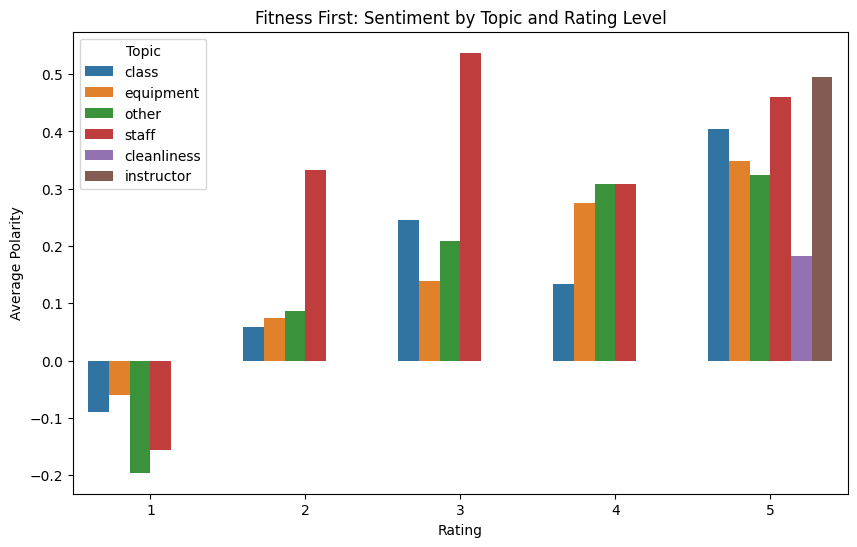

In [123]:
# 4. Visualize the sentiment by topic and rating level 
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='Avg_polarity', hue='Topic', data=ff_sentiment_by_topic)
plt.title('Fitness First: Sentiment by Topic and Rating Level')
plt.xlabel('Rating')
plt.ylabel('Average Polarity')
plt.show()

#### Virgin Active

In [125]:
# 1. Perform Sentiment Analysis on 'review' column
def analyze_sentiment(text):
    # Get polarity and subjectivity using TextBlob
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# 2. Define topics (manually or use keyword matching)
topics = ['class', 'staff', 'instructor', 'equipment', 'clean', 'pilates']  # Define topics of interest

# Create a new column for the detected topic in each review
def detect_topic(text, topics):
    for topic in topics:
        if topic.lower() in text.lower():
            return topic
    return 'other'

va_reviews_copy['Topic'] = va_reviews_copy['review'].apply(lambda x: detect_topic(x, topics))

# 3. Group by Rating and Topic and calculate the average sentiment scores
va_sentiment_by_topic = va_reviews_copy.groupby(['rating', 'Topic']).agg(
    Avg_polarity=('Polarity', 'mean'),
    Avg_subjectivity=('Subjectivity', 'mean')
).reset_index()

va_sentiment_by_topic.head(2)

,rating,Topic,Avg_polarity,Avg_subjectivity
0,1,class,-0.100377,0.528907
1,1,clean,-0.177778,0.600000


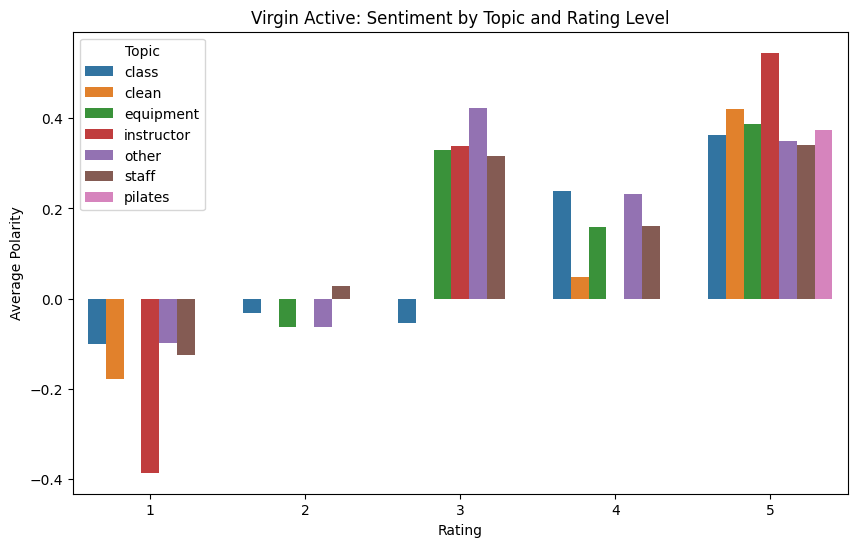

In [126]:
# 4. Visualize the sentiment by topic and rating level 
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='Avg_polarity', hue='Topic', data=va_sentiment_by_topic)
plt.title('Virgin Active: Sentiment by Topic and Rating Level')
plt.xlabel('Rating')
plt.ylabel('Average Polarity')
plt.show()